In [2]:
import os
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.style.use('default')

In [3]:
# loading output of 'Analyze_behavior_jans.m'
output = loadmat('/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/output_2.mat')

In [4]:
# structure of output
output.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Folders', 'MaleSong_FliesKinematics', 'param'])

In [5]:
# note the order of the genotypes!
output['Folders']

array([[array(['pc2_tnt'], dtype='<U7'),
        array(['pc2_control'], dtype='<U11')]], dtype=object)

In [6]:
# columns 0-10
np.concatenate(output['MaleSong_FliesKinematics']['SongFeatures'][0][0])

array([array(['Pulse amount'], dtype='<U12'),
       array(['Sine amount'], dtype='<U11'),
       array(['Bout amount'], dtype='<U11'),
       array(['Pulse onsets'], dtype='<U12'),
       array(['Sine onsets'], dtype='<U11'),
       array(['Bout onsets'], dtype='<U11'), array(['IPI'], dtype='<U3'),
       array(['Pulse duration'], dtype='<U14'),
       array(['Sine duration'], dtype='<U13'),
       array(['Bout duration'], dtype='<U13'),
       array(['Pause'], dtype='<U5')], dtype=object)

In [7]:
# columns 11-22
np.concatenate(output['MaleSong_FliesKinematics']['FliesKinematics'][0][0])

array([array(['Female forward velocity'], dtype='<U23'),
       array(['Female lateral velocity'], dtype='<U23'),
       array(['Female rotational velocity'], dtype='<U26'),
       array(['Female absolute velocity'], dtype='<U24'),
       array(['Male forward velocity'], dtype='<U21'),
       array(['Male lateral velocity'], dtype='<U21'),
       array(['Male rotational velocity'], dtype='<U24'),
       array(['Male absolute velocity'], dtype='<U22'),
       array(['Male-Female distance'], dtype='<U20')], dtype=object)

In [8]:
# pc2_tnt
output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][0].shape

(1076, 23)

In [9]:
# pc2_control
output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][1].shape

(475, 23)

In [10]:
controlIDX = 1
tntIDX = 0
songftrs = output['MaleSong_FliesKinematics']['SongFeatures'][0][0][0]

# setting up dataframe for easier plotting
df = pd.DataFrame(columns=['label', 'coeff', 'condition'])
df_change = pd.DataFrame(columns=['label', 'dcoeff'])

for idx, ftr in enumerate(songftrs):
    print(idx, ftr[0])
    fSpeed_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,14]
    ftr_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,idx]
    stat_c, _ = spearmanr(fSpeed_control, ftr_control)
    df.loc[len(df.index)] = [ftr[0], stat_c, 'pc2_control']

    fSpeed_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,14]
    ftr_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,idx]
    stat_t, _ = spearmanr(fSpeed_tnt, ftr_tnt)
    df.loc[len(df.index)] = [ftr[0], stat_t, 'pc2_tnt']

    df_change.loc[len(df_change.index)] = [ftr[0], stat_t-stat_c]

0 Pulse amount
1 Sine amount
2 Bout amount
3 Pulse onsets
4 Sine onsets
5 Bout onsets
6 IPI
7 Pulse duration
8 Sine duration
9 Bout duration
10 Pause


In [12]:
order = ['IPI', 'Pulse amount', 'Pulse onsets', 'Pulse duration', 'Sine amount', 'Sine onsets', 'Sine duration', 'Bout amount', 'Bout onsets', 'Bout duration']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


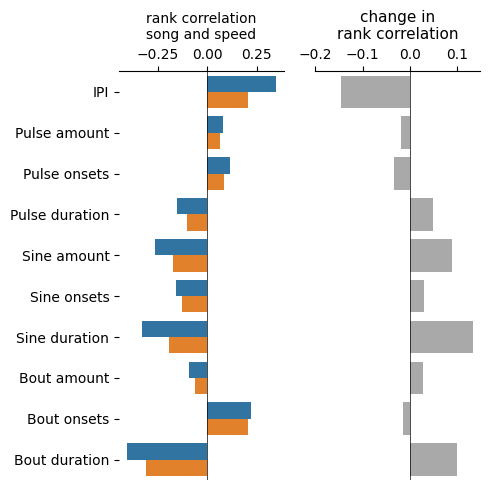

In [22]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(121)
sns.barplot(x='coeff', y='label', data=df, hue='condition', order= order, ax=ax)
ax.legend().set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('rank correlation\nsong and speed', fontsize=10)
ax.axvline(0, c='k', lw=0.5)

ax.set_xticks([-0.25, 0, 0.25])

ax1 = fig.add_subplot(122)
sns.barplot(x='dcoeff', y='label', data=df_change, order= order, ax=ax1, color='darkgray')
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend().set_visible(False)

ax1.axvline(0, c='k', lw=0.5)
ax1.set_xlabel('')
ax1.set_title('change in\nrank correlation', fontsize=11)

ax1.set_xticks([-0.2,-0.1, 0, 0.1])


sns.despine(left=True, bottom=True, top=False)
plt.tight_layout()
plt.savefig(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots/rankCorrelation.svg')

In [14]:
fSpeed_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,14]
ipi_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,6]/10 # change to milliseconds
fSpeed_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,14]
ipi_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,6]/10 # change to milliseconds

In [15]:
_, bin_edges_control = np.histogram(ipi_control)
_, bin_edges_tnt = np.histogram(ipi_tnt)

In [16]:
ipiDF = pd.DataFrame(columns=['ipi', 'fspeed', 'condition'])
for be in range(len(bin_edges_control)):
    if be==len(bin_edges_control)-1:
        continue
    bin_center = np.mean((bin_edges_control[be], bin_edges_control[be+1]))
    idxs = np.where((ipi_control>=bin_edges_control[be]) & (ipi_control<=bin_edges_control[be+1]))[0]
    for idx in idxs:
        ipiDF.loc[len(ipiDF.index)] = [bin_center, fSpeed_control[idx], 'pC2l control']

for be in range(len(bin_edges_tnt)):
    if be==len(bin_edges_tnt)-1:
        continue
    bin_center = np.mean((bin_edges_tnt[be], bin_edges_tnt[be+1]))
    idxs = np.where((ipi_tnt>=bin_edges_tnt[be]) & (ipi_tnt<=bin_edges_tnt[be+1]))[0]
    for idx in idxs:
        ipiDF.loc[len(ipiDF.index)] = [bin_center, fSpeed_tnt[idx], 'pC2l TNT']

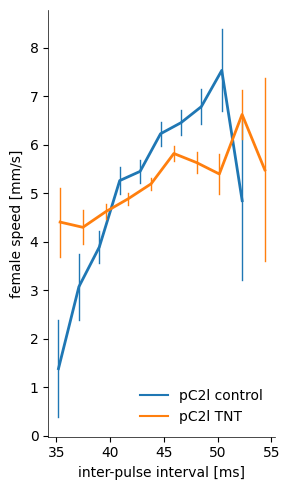

In [21]:

fig, ax = plt.subplots(figsize=(3,5))
sns.lineplot(data=ipiDF, x='ipi', y='fspeed', hue='condition', errorbar='se', err_style='bars',ax=ax, lw=2, err_kws={'elinewidth':1, 'capsize':0})
ax.grid(False)
ax.set_ylabel('female speed [mm/s]')
ax.set_xlabel('inter-pulse interval [ms]')
plt.setp(ax.spines.values(), linewidth=0.5, color='k')
ax.legend(frameon=False, loc='lower right')
sns.despine()
plt.tight_layout()
plt.savefig(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots/ipi_speed.svg')